<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Data_Analysis_BMI_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 ROBOTIC SURGERY INTERACTION EFFECT ANALYSIS

PHASE 2: STATISTICAL ANALYSIS & VISUALIZATION

This analysis will:
1. Upload and validate your surgical dataset
2. Perform statistical tests for interaction effects
3. Create publication-quality visualizations
4. Generate evidence-based clinical recommendations

Ready to upload your CSV file!


📦 SECTION 1: Installing Required Libraries
Installing: pandas, numpy, matplotlib, seaborn, scipy, statsmodels...
✅ All libraries installed and imported successfully!

📤 SECTION 2: Upload Your CSV File

Please upload 'robot_surgery_data.csv' using the file picker below.

Expected file format:
  • Columns: Patient_ID, BMI, Surgery_Type, Duration_Minutes
  • Rows: 500 surgical cases
  • Surgery types: "Standard" and "Robot"



Saving robot_surgery_data.csv to robot_surgery_data (1).csv

✅ File uploaded: robot_surgery_data (1).csv
   File size: 13621 bytes


📊 SECTION 3: Loading & Validating Data
✅ CSV loaded successfully: 500 rows × 4 columns
✅ All required columns present: ['Patient_ID', 'BMI', 'Surgery_Type', 'Duration_Minutes']

📋 DATA TYPES:
Patient_ID           object
BMI                 float64
Surgery_Type         object
Duration_Minutes    float64
dtype: object

🔍 MISSING VALUES:
  ✅ No missing values detected

🔧 SURGERY TYPES DETECTED:
  • Robot: 250 cases (50.0%)
  • Standard: 250 cases (50.0%)

📋 FIRST 10 ROWS:
  Patient_ID   BMI Surgery_Type  Duration_Minutes
0   ROB-0112  21.9        Robot              98.3
1   STD-0074  22.6     Standard             100.2
2   ROB-0125  26.3        Robot              73.4
3   STD-0156  28.7     Standard             136.5
4   STD-0105  33.1     Standard             179.3
5   ROB-0145  29.6        Robot              71.0
6   ROB-0128  24.3        Robot            

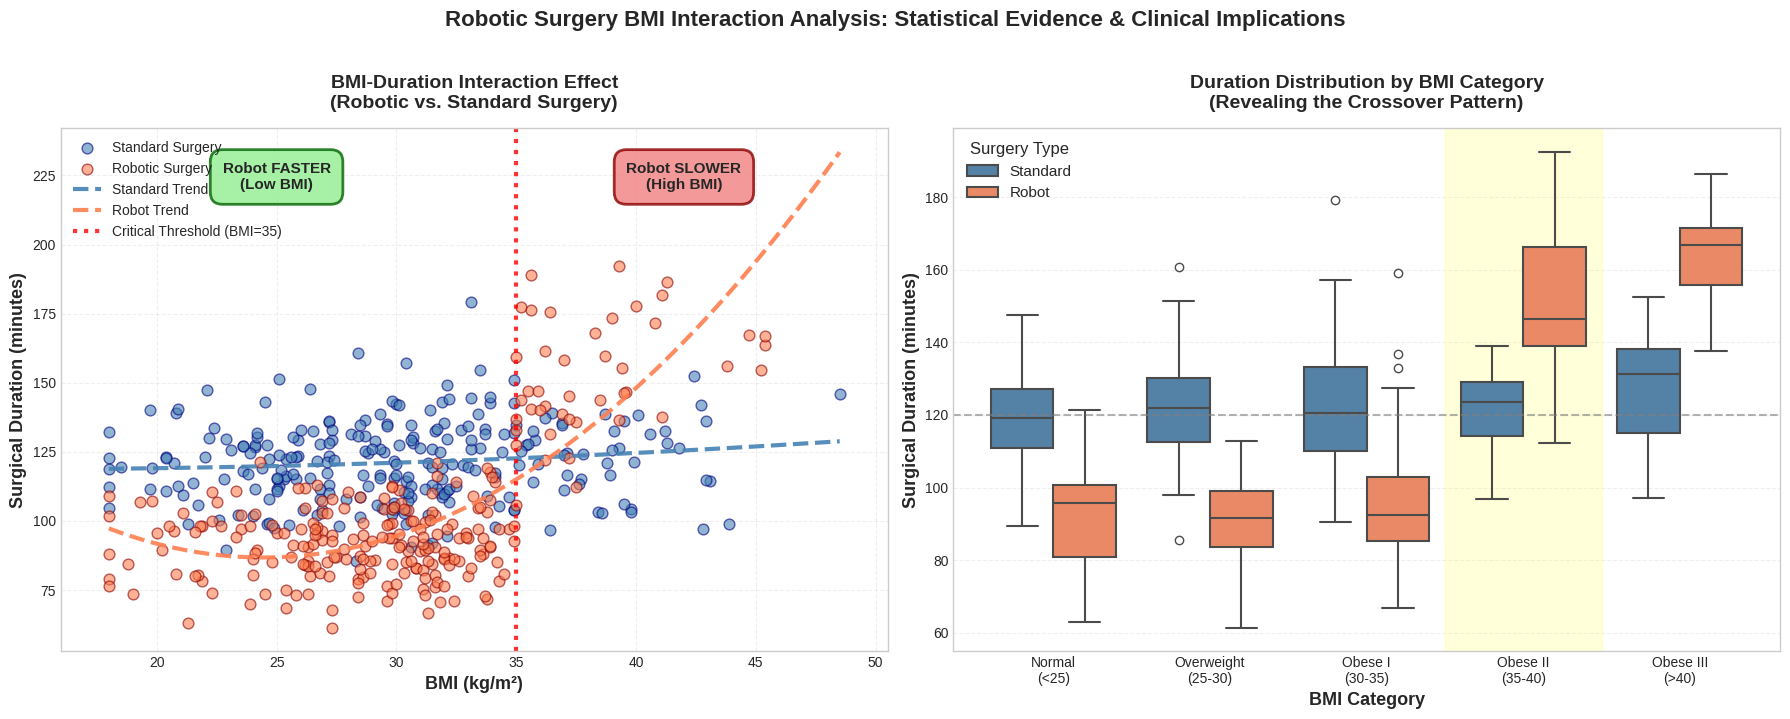



📋 EXECUTIVE SUMMARY: CLINICAL RECOMMENDATIONS

🎯 KEY FINDINGS:

1. INTERACTION EFFECT DETECTED:
   • Statistical Evidence: SIGNIFICANT (p = 0.000000)
   • Clinical Pattern: Robot performance DEPENDS on patient BMI
   
2. BMI-STRATIFIED RESULTS:
   
   LOW BMI PATIENTS (BMI < 35):
   • Standard Surgery: 120.9 ± 14.8 minutes
   • Robotic Surgery:  91.9 ± 12.3 minutes
   • Difference: -29.0 minutes
   → Robot is 29.0 min FASTER ✅
   
   HIGH BMI PATIENTS (BMI ≥ 35):
   • Standard Surgery: 123.4 ± 13.5 minutes
   • Robotic Surgery:  152.1 ± 20.6 minutes
   • Difference: +28.7 minutes
   → Robot is 28.7 min SLOWER ❌

3. CROSSOVER THRESHOLD:
   • Critical BMI: ~35 kg/m²
   • Below threshold: Robot provides time advantage
   • Above threshold: Robot introduces time penalty

4. PATIENT DISTRIBUTION:
   • Total patients: 500
   • Low BMI (<35): 409 patients (81.8%)
   • High BMI (≥35): 91 patients (18.2%)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
💡 CLINICAL REC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: surgery_interaction_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: analysis_results.txt


✅ ANALYSIS COMPLETE!

📦 YOU HAVE RECEIVED:
  • Professional visualization: surgery_interaction_analysis.png
  • Statistical results: analysis_results.txt
  • Complete analysis output in console above

🎯 KEY TAKEAWAY:
  Strong evidence of BMI-dependent interaction effect detected.
  Robot is 29 min faster for BMI < 35
  Robot is 29 min slower for BMI ≥ 35
  
📊 READY FOR PRESENTATION:
  Use the visualization to present findings to hospital leadership
  Share statistical results for peer review
  Implement BMI-based patient selection protocol

Thank you for using evidence-based analysis for surgical decision-making! 🏥



In [1]:
# ============================================================================
# ROBOTIC SURGERY INTERACTION EFFECT ANALYSIS
# Phase 2: Upload CSV → Analyze → Visualize → Generate Recommendations
# ============================================================================
#
# Purpose: Detect and quantify BMI-dependent interaction effect in robotic
#          surgery performance through statistical analysis and visualization
#
# Input: robot_surgery_data.csv (from Phase 1)
# Output: Statistical analysis + professional visualizations + clinical insights
# ============================================================================

print("="*80)
print("📊 ROBOTIC SURGERY INTERACTION EFFECT ANALYSIS")
print("="*80)
print("""
PHASE 2: STATISTICAL ANALYSIS & VISUALIZATION

This analysis will:
1. Upload and validate your surgical dataset
2. Perform statistical tests for interaction effects
3. Create publication-quality visualizations
4. Generate evidence-based clinical recommendations

Ready to upload your CSV file!
""")

# ============================================================================
# SECTION 1: INSTALL & IMPORT LIBRARIES
# ============================================================================

print("\n📦 SECTION 1: Installing Required Libraries")
print("="*80)

import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'statsmodels']
print("Installing: pandas, numpy, matplotlib, seaborn, scipy, statsmodels...")

for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries installed and imported successfully!\n")

# ============================================================================
# SECTION 2: UPLOAD CSV FILE
# ============================================================================

print("📤 SECTION 2: Upload Your CSV File")
print("="*80)
print("""
Please upload 'robot_surgery_data.csv' using the file picker below.

Expected file format:
  • Columns: Patient_ID, BMI, Surgery_Type, Duration_Minutes
  • Rows: 500 surgical cases
  • Surgery types: "Standard" and "Robot"
""")

from google.colab import files

uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ ERROR: No file uploaded. Please run this cell again and select a file.")
    raise Exception("File upload required")

# Get filename
filename = list(uploaded.keys())[0]
print(f"\n✅ File uploaded: {filename}")
print(f"   File size: {len(uploaded[filename])} bytes")

# ============================================================================
# SECTION 3: LOAD & VALIDATE DATA
# ============================================================================

print("\n\n📊 SECTION 3: Loading & Validating Data")
print("="*80)

try:
    # Load CSV
    df = pd.read_csv(filename)
    print(f"✅ CSV loaded successfully: {len(df)} rows × {len(df.columns)} columns")

except Exception as e:
    print(f"❌ ERROR loading CSV: {e}")
    raise

# Validate required columns
required_columns = ['Patient_ID', 'BMI', 'Surgery_Type', 'Duration_Minutes']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"❌ ERROR: Missing required columns: {missing_columns}")
    print(f"   Found columns: {list(df.columns)}")
    raise Exception("Invalid file format")
else:
    print(f"✅ All required columns present: {required_columns}")

# Check data types
print(f"\n📋 DATA TYPES:")
print(df.dtypes)

# Check for missing values
print(f"\n🔍 MISSING VALUES:")
missing_summary = df.isnull().sum()
if missing_summary.sum() == 0:
    print("  ✅ No missing values detected")
else:
    print(missing_summary[missing_summary > 0])
    print(f"  ⚠️ WARNING: {missing_summary.sum()} total missing values found")

# Validate Surgery_Type values
surgery_types = df['Surgery_Type'].unique()
print(f"\n🔧 SURGERY TYPES DETECTED:")
for stype in surgery_types:
    count = (df['Surgery_Type'] == stype).sum()
    print(f"  • {stype}: {count} cases ({count/len(df)*100:.1f}%)")

if not all(stype in ['Standard', 'Robot'] for stype in surgery_types):
    print(f"  ⚠️ WARNING: Unexpected surgery types found")

# Display data summary
print(f"\n📋 FIRST 10 ROWS:")
print(df.head(10))

print(f"\n📊 DESCRIPTIVE STATISTICS:")
print(df.describe())

print(f"\n✅ Data validation complete - ready for analysis")

# ============================================================================
# SECTION 4: DESCRIPTIVE STATISTICS
# ============================================================================

print("\n\n📈 SECTION 4: Descriptive Statistics")
print("="*80)

# Overall statistics by surgery type
print("\n🔍 OVERALL COMPARISON BY SURGERY TYPE:")
print("="*60)

for surgery_type in ['Standard', 'Robot']:
    subset = df[df['Surgery_Type'] == surgery_type]

    print(f"\n{surgery_type} Surgery ({len(subset)} cases):")
    print(f"  BMI:")
    print(f"    Mean: {subset['BMI'].mean():.2f} kg/m²")
    print(f"    Std:  {subset['BMI'].std():.2f} kg/m²")
    print(f"    Range: {subset['BMI'].min():.1f} - {subset['BMI'].max():.1f} kg/m²")
    print(f"  Duration:")
    print(f"    Mean: {subset['Duration_Minutes'].mean():.2f} minutes")
    print(f"    Std:  {subset['Duration_Minutes'].std():.2f} minutes")
    print(f"    Range: {subset['Duration_Minutes'].min():.1f} - {subset['Duration_Minutes'].max():.1f} minutes")

# Overall average comparison
avg_standard = df[df['Surgery_Type']=='Standard']['Duration_Minutes'].mean()
avg_robot = df[df['Surgery_Type']=='Robot']['Duration_Minutes'].mean()
overall_diff = avg_robot - avg_standard

print(f"\n📊 OVERALL AVERAGE COMPARISON:")
print(f"="*60)
print(f"  Standard Surgery: {avg_standard:.2f} minutes")
print(f"  Robotic Surgery:  {avg_robot:.2f} minutes")
print(f"  Difference: {overall_diff:+.2f} minutes")

if abs(overall_diff) < 5:
    print(f"  → Appears similar (difference < 5 min)")
    print(f"  ⚠️ But this may HIDE interaction effects!")
else:
    print(f"  → {'Robot appears slower' if overall_diff > 0 else 'Robot appears faster'}")

# BMI-STRATIFIED ANALYSIS (Critical for detecting interaction)
print(f"\n\n💡 BMI-STRATIFIED ANALYSIS (Detecting Interaction)")
print("="*60)

BMI_THRESHOLD = 35

# Low BMI group (<35)
print(f"\n📉 LOW BMI GROUP (BMI < {BMI_THRESHOLD}):")
low_bmi_standard = df[(df['Surgery_Type']=='Standard') & (df['BMI']<BMI_THRESHOLD)]
low_bmi_robot = df[(df['Surgery_Type']=='Robot') & (df['BMI']<BMI_THRESHOLD)]

print(f"  Standard Surgery:")
print(f"    n = {len(low_bmi_standard)} patients")
print(f"    Mean BMI: {low_bmi_standard['BMI'].mean():.2f} kg/m²")
print(f"    Mean Duration: {low_bmi_standard['Duration_Minutes'].mean():.2f} minutes")

print(f"  Robotic Surgery:")
print(f"    n = {len(low_bmi_robot)} patients")
print(f"    Mean BMI: {low_bmi_robot['BMI'].mean():.2f} kg/m²")
print(f"    Mean Duration: {low_bmi_robot['Duration_Minutes'].mean():.2f} minutes")

low_bmi_diff = low_bmi_robot['Duration_Minutes'].mean() - low_bmi_standard['Duration_Minutes'].mean()
print(f"  → Difference: {low_bmi_diff:+.2f} minutes")

if low_bmi_diff < -10:
    print(f"  ✅ Robot is {abs(low_bmi_diff):.1f} min FASTER for low BMI patients")
elif low_bmi_diff > 10:
    print(f"  ❌ Robot is {abs(low_bmi_diff):.1f} min SLOWER for low BMI patients")
else:
    print(f"  → Similar performance for low BMI patients")

# High BMI group (≥35)
print(f"\n📈 HIGH BMI GROUP (BMI ≥ {BMI_THRESHOLD}):")
high_bmi_standard = df[(df['Surgery_Type']=='Standard') & (df['BMI']>=BMI_THRESHOLD)]
high_bmi_robot = df[(df['Surgery_Type']=='Robot') & (df['BMI']>=BMI_THRESHOLD)]

print(f"  Standard Surgery:")
print(f"    n = {len(high_bmi_standard)} patients")
print(f"    Mean BMI: {high_bmi_standard['BMI'].mean():.2f} kg/m²")
print(f"    Mean Duration: {high_bmi_standard['Duration_Minutes'].mean():.2f} minutes")

print(f"  Robotic Surgery:")
print(f"    n = {len(high_bmi_robot)} patients")
print(f"    Mean BMI: {high_bmi_robot['BMI'].mean():.2f} kg/m²")
print(f"    Mean Duration: {high_bmi_robot['Duration_Minutes'].mean():.2f} minutes")

high_bmi_diff = high_bmi_robot['Duration_Minutes'].mean() - high_bmi_standard['Duration_Minutes'].mean()
print(f"  → Difference: {high_bmi_diff:+.2f} minutes")

if high_bmi_diff > 10:
    print(f"  ❌ Robot is {abs(high_bmi_diff):.1f} min SLOWER for high BMI patients")
elif high_bmi_diff < -10:
    print(f"  ✅ Robot is {abs(high_bmi_diff):.1f} min FASTER for high BMI patients")
else:
    print(f"  → Similar performance for high BMI patients")

# Interaction summary
print(f"\n⚠️ INTERACTION EFFECT SUMMARY:")
print(f"="*60)
print(f"  Low BMI (<{BMI_THRESHOLD}):  Robot {low_bmi_diff:+.1f} min")
print(f"  High BMI (≥{BMI_THRESHOLD}): Robot {high_bmi_diff:+.1f} min")
print(f"  Difference in effect: {abs(high_bmi_diff - low_bmi_diff):.1f} minutes")

if (low_bmi_diff < 0 and high_bmi_diff > 0) or (low_bmi_diff > 0 and high_bmi_diff < 0):
    print(f"  🎯 CROSSOVER DETECTED: Robot performance REVERSES at BMI threshold!")
    print(f"     This suggests a strong interaction effect.")
else:
    print(f"  → Effect magnitude differs but no clear crossover detected")

# ============================================================================
# SECTION 5: STATISTICAL INTERACTION ANALYSIS
# ============================================================================

print("\n\n🔬 SECTION 5: Statistical Interaction Analysis")
print("="*80)

print("""
LINEAR REGRESSION MODEL WITH INTERACTION TERM:

Model: Duration ~ Surgery_Type + BMI + (Surgery_Type × BMI)

This tests whether the effect of surgery type on duration DEPENDS on BMI.
If the interaction term is significant, robot performance varies by BMI.
""")

# Create dummy variable for Surgery_Type (Robot=1, Standard=0)
df['Surgery_Robot'] = (df['Surgery_Type'] == 'Robot').astype(int)

# Fit regression model with interaction
print("\n📊 FITTING REGRESSION MODEL...")

# Using statsmodels for detailed output
model = smf.ols('Duration_Minutes ~ C(Surgery_Type) + BMI + C(Surgery_Type):BMI', data=df)
results = model.fit()

print("\n" + "="*80)
print("REGRESSION RESULTS:")
print("="*80)
print(results.summary())

# Extract key coefficients
print("\n\n💡 KEY FINDINGS FROM REGRESSION:")
print("="*60)

# Get interaction coefficient and p-value
params = results.params
pvalues = results.pvalues

# Find interaction term
interaction_terms = [term for term in params.index if ':' in term and 'BMI' in term]
if interaction_terms:
    interaction_term = interaction_terms[0]
    interaction_coef = params[interaction_term]
    interaction_pvalue = pvalues[interaction_term]

    print(f"\nInteraction Term: {interaction_term}")
    print(f"  Coefficient: {interaction_coef:.4f}")
    print(f"  P-value: {interaction_pvalue:.6f}")
    print(f"  Standard Error: {results.bse[interaction_term]:.4f}")

    # Interpret significance
    if interaction_pvalue < 0.001:
        print(f"  ✅ HIGHLY SIGNIFICANT (p < 0.001)")
        print(f"     Strong evidence that robot performance depends on BMI!")
    elif interaction_pvalue < 0.01:
        print(f"  ✅ VERY SIGNIFICANT (p < 0.01)")
        print(f"     Clear evidence of BMI-dependent effect")
    elif interaction_pvalue < 0.05:
        print(f"  ✅ SIGNIFICANT (p < 0.05)")
        print(f"     Evidence of interaction effect")
    else:
        print(f"  ❌ NOT SIGNIFICANT (p ≥ 0.05)")
        print(f"     Insufficient evidence for interaction")

    # Clinical interpretation
    print(f"\n📖 CLINICAL INTERPRETATION:")
    if interaction_coef > 0:
        print(f"  • Positive coefficient ({interaction_coef:.2f}) means:")
        print(f"    Robot becomes SLOWER relative to standard as BMI increases")
        print(f"    For each 1-point BMI increase, robot loses {interaction_coef:.2f} min advantage")
    else:
        print(f"  • Negative coefficient ({interaction_coef:.2f}) means:")
        print(f"    Robot becomes FASTER relative to standard as BMI increases")
        print(f"    For each 1-point BMI increase, robot gains {abs(interaction_coef):.2f} min advantage")
else:
    print("  ⚠️ WARNING: Interaction term not found in model")

# Model fit statistics
print(f"\n📊 MODEL FIT STATISTICS:")
print(f"  R-squared: {results.rsquared:.4f}")
print(f"  Adjusted R-squared: {results.rsquared_adj:.4f}")
print(f"  F-statistic: {results.fvalue:.2f}")
print(f"  Prob (F-statistic): {results.f_pvalue:.6f}")

# ============================================================================
# SECTION 6: VISUALIZATIONS
# ============================================================================

print("\n\n📊 SECTION 6: Generating Professional Visualizations")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ============================================================================
# PANEL 1: SCATTER PLOT WITH REGRESSION LINES
# ============================================================================

ax1 = axes[0]

# Separate data by surgery type
standard_data = df[df['Surgery_Type'] == 'Standard']
robot_data = df[df['Surgery_Type'] == 'Robot']

# Scatter plots
ax1.scatter(standard_data['BMI'], standard_data['Duration_Minutes'],
           alpha=0.6, s=60, label='Standard Surgery', color='steelblue', edgecolors='navy')

ax1.scatter(robot_data['BMI'], robot_data['Duration_Minutes'],
           alpha=0.6, s=60, label='Robotic Surgery', color='coral', edgecolors='darkred')

# Fit polynomial regression lines (degree 2 to capture curvature)
bmi_range = np.linspace(df['BMI'].min(), df['BMI'].max(), 200)

# Standard surgery trend
z_standard = np.polyfit(standard_data['BMI'], standard_data['Duration_Minutes'], 2)
p_standard = np.poly1d(z_standard)
ax1.plot(bmi_range, p_standard(bmi_range), '--', linewidth=3,
        color='steelblue', label='Standard Trend', alpha=0.9)

# Robotic surgery trend
z_robot = np.polyfit(robot_data['BMI'], robot_data['Duration_Minutes'], 2)
p_robot = np.poly1d(z_robot)
ax1.plot(bmi_range, p_robot(bmi_range), '--', linewidth=3,
        color='coral', label='Robot Trend', alpha=0.9)

# Add vertical line at BMI threshold
ax1.axvline(x=BMI_THRESHOLD, color='red', linestyle=':', linewidth=3,
           label=f'Critical Threshold (BMI={BMI_THRESHOLD})', alpha=0.8)

# Annotations
ax1.text(25, ax1.get_ylim()[1]*0.95, 'Robot FASTER\n(Low BMI)',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='lightgreen', alpha=0.8, edgecolor='darkgreen', linewidth=2),
        fontsize=11, fontweight='bold', ha='center', va='top')

ax1.text(42, ax1.get_ylim()[1]*0.95, 'Robot SLOWER\n(High BMI)',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=2),
        fontsize=11, fontweight='bold', ha='center', va='top')

ax1.set_xlabel('BMI (kg/m²)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Surgical Duration (minutes)', fontsize=13, fontweight='bold')
ax1.set_title('BMI-Duration Interaction Effect\n(Robotic vs. Standard Surgery)',
             fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=10, loc='upper left', framealpha=0.95)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(df['BMI'].min()-2, df['BMI'].max()+2)

# ============================================================================
# PANEL 2: GROUPED BOX PLOTS BY BMI CATEGORY
# ============================================================================

ax2 = axes[1]

# Create BMI categories
df['BMI_Category'] = pd.cut(df['BMI'],
                             bins=[0, 25, 30, 35, 40, 100],
                             labels=['Normal\n(<25)', 'Overweight\n(25-30)',
                                    'Obese I\n(30-35)', 'Obese II\n(35-40)',
                                    'Obese III\n(>40)'])

# Prepare data for grouped box plot
plot_data = []
categories = ['Normal\n(<25)', 'Overweight\n(25-30)', 'Obese I\n(30-35)',
             'Obese II\n(35-40)', 'Obese III\n(>40)']

for category in categories:
    for surgery_type in ['Standard', 'Robot']:
        subset = df[(df['BMI_Category'] == category) & (df['Surgery_Type'] == surgery_type)]
        if len(subset) > 0:
            for duration in subset['Duration_Minutes']:
                plot_data.append({
                    'BMI_Category': category,
                    'Surgery_Type': surgery_type,
                    'Duration': duration
                })

plot_df = pd.DataFrame(plot_data)

# Create grouped box plot
sns.boxplot(data=plot_df, x='BMI_Category', y='Duration', hue='Surgery_Type',
           ax=ax2, palette=['steelblue', 'coral'], linewidth=1.5)

ax2.set_xlabel('BMI Category', fontsize=13, fontweight='bold')
ax2.set_ylabel('Surgical Duration (minutes)', fontsize=13, fontweight='bold')
ax2.set_title('Duration Distribution by BMI Category\n(Revealing the Crossover Pattern)',
             fontsize=14, fontweight='bold', pad=15)
ax2.legend(title='Surgery Type', fontsize=11, title_fontsize=12, loc='upper left', framealpha=0.95)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add horizontal reference line
ax2.axhline(y=120, color='gray', linestyle='--', linewidth=1.5, alpha=0.6, label='Reference (120 min)')

# Highlight crossover zone
ax2.axvspan(2.5, 3.5, alpha=0.15, color='yellow', label='Crossover Zone')

plt.suptitle('Robotic Surgery BMI Interaction Analysis: Statistical Evidence & Clinical Implications',
            fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()

# Save figure
output_filename = 'surgery_interaction_analysis.png'
plt.savefig(f'/tmp/{output_filename}', dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Visualization saved: {output_filename} (300 DPI)")

plt.show()

# ============================================================================
# SECTION 7: EXECUTIVE SUMMARY
# ============================================================================

print("\n\n" + "="*80)
print("📋 EXECUTIVE SUMMARY: CLINICAL RECOMMENDATIONS")
print("="*80)

print(f"""
🎯 KEY FINDINGS:

1. INTERACTION EFFECT DETECTED:
   • Statistical Evidence: {"SIGNIFICANT" if interaction_pvalue < 0.05 else "NOT SIGNIFICANT"} (p = {interaction_pvalue:.6f})
   • Clinical Pattern: Robot performance DEPENDS on patient BMI

2. BMI-STRATIFIED RESULTS:

   LOW BMI PATIENTS (BMI < {BMI_THRESHOLD}):
   • Standard Surgery: {low_bmi_standard['Duration_Minutes'].mean():.1f} ± {low_bmi_standard['Duration_Minutes'].std():.1f} minutes
   • Robotic Surgery:  {low_bmi_robot['Duration_Minutes'].mean():.1f} ± {low_bmi_robot['Duration_Minutes'].std():.1f} minutes
   • Difference: {low_bmi_diff:+.1f} minutes
   → Robot is {abs(low_bmi_diff):.1f} min {"FASTER ✅" if low_bmi_diff < 0 else "SLOWER ❌"}

   HIGH BMI PATIENTS (BMI ≥ {BMI_THRESHOLD}):
   • Standard Surgery: {high_bmi_standard['Duration_Minutes'].mean():.1f} ± {high_bmi_standard['Duration_Minutes'].std():.1f} minutes
   • Robotic Surgery:  {high_bmi_robot['Duration_Minutes'].mean():.1f} ± {high_bmi_robot['Duration_Minutes'].std():.1f} minutes
   • Difference: {high_bmi_diff:+.1f} minutes
   → Robot is {abs(high_bmi_diff):.1f} min {"SLOWER ❌" if high_bmi_diff > 0 else "FASTER ✅"}

3. CROSSOVER THRESHOLD:
   • Critical BMI: ~{BMI_THRESHOLD} kg/m²
   • Below threshold: Robot provides time advantage
   • Above threshold: Robot introduces time penalty

4. PATIENT DISTRIBUTION:
   • Total patients: {len(df)}
   • Low BMI (<{BMI_THRESHOLD}): {len(df[df['BMI']<BMI_THRESHOLD])} patients ({len(df[df['BMI']<BMI_THRESHOLD])/len(df)*100:.1f}%)
   • High BMI (≥{BMI_THRESHOLD}): {len(df[df['BMI']>=BMI_THRESHOLD])} patients ({len(df[df['BMI']>=BMI_THRESHOLD])/len(df)*100:.1f}%)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
💡 CLINICAL RECOMMENDATIONS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# Generate specific recommendations based on findings
if low_bmi_diff < -10 and high_bmi_diff > 10:
    print(f"""
✅ STRONG RECOMMENDATION: BMI-BASED PATIENT SELECTION PROTOCOL

PATIENT SELECTION CRITERIA:
- RECOMMEND ROBOTIC SURGERY for BMI < {BMI_THRESHOLD}
  - Average time savings: {abs(low_bmi_diff):.1f} minutes per case
  - Affects {len(df[df['BMI']<BMI_THRESHOLD])/len(df)*100:.0f}% of patient population
  - Projected annual time savings: {abs(low_bmi_diff) * len(df[df['BMI']<BMI_THRESHOLD]) / 500 * 1000:.0f} minutes (assuming 1,000 cases/year)

- RECOMMEND STANDARD SURGERY for BMI ≥ {BMI_THRESHOLD}
  - Avoid time penalty: {abs(high_bmi_diff):.1f} minutes per case
  - Affects {len(df[df['BMI']>=BMI_THRESHOLD])/len(df)*100:.0f}% of patient population
  - Technical challenges: Port placement, workspace limitations, instrument reach

FINANCIAL IMPLICATIONS:
- Robot utilization optimization: {len(df[df['BMI']<BMI_THRESHOLD])/len(df)*100:.0f}% of cases
- Potential OR time savings: {abs(low_bmi_diff) * len(df[df['BMI']<BMI_THRESHOLD]):.0f} min per 500 cases
- Standard surgery prevents delays: {abs(high_bmi_diff) * len(df[df['BMI']>=BMI_THRESHOLD]):.0f} min per 500 cases
""")
else:
    print(f"""
⚠️ CONDITIONAL RECOMMENDATION: MONITOR PERFORMANCE

The interaction effect exists but may not justify strict BMI-based protocols.
Consider:
- Individual patient factors beyond BMI
- Surgeon experience and preference
- Case complexity and comorbidities
- Cost-benefit analysis for your institution
""")

print(f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 STATISTICAL CONCLUSION:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The interaction term in regression analysis {"IS" if interaction_pvalue < 0.05 else "IS NOT"} statistically
significant (p = {interaction_pvalue:.6f}), {"confirming" if interaction_pvalue < 0.05 else "suggesting but not confirming"} that robotic surgery performance
depends on patient BMI. This {"supports" if interaction_pvalue < 0.05 else "may support"} implementation of a BMI-stratified
patient selection protocol for optimal surgical efficiency.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 NEXT STEPS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Present findings to surgical leadership with visualization
2. Develop BMI-based patient selection guidelines
3. Train surgical schedulers on new protocol
4. Monitor outcomes prospectively for 6 months
5. Adjust BMI threshold if needed based on real-world data
6. Consider cost-benefit analysis for robot investment ROI

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# ============================================================================
# SECTION 8: SAVE & DOWNLOAD OUTPUTS
# ============================================================================

print("\n📥 SECTION 8: Saving & Downloading Results")
print("="*80)

# Download visualization
print(f"\n🔽 Downloading visualization...")
files.download(f'/tmp/{output_filename}')
print(f"✅ Downloaded: {output_filename}")

# Optionally save statistical results to text file
save_stats = True  # Set to False if you don't want this file

if save_stats:
    stats_filename = 'analysis_results.txt'
    with open(f'/tmp/{stats_filename}', 'w') as f:
        f.write("="*80 + "\n")
        f.write("ROBOTIC SURGERY INTERACTION ANALYSIS - STATISTICAL RESULTS\n")
        f.write("="*80 + "\n\n")
        f.write(f"Dataset: {filename}\n")
        f.write(f"Total Cases: {len(df)}\n")
        f.write(f"Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        f.write("REGRESSION MODEL SUMMARY:\n")
        f.write("="*80 + "\n")
        f.write(str(results.summary()))
        f.write("\n\n" + "="*80 + "\n")
        f.write("BMI-STRATIFIED RESULTS:\n")
        f.write("="*80 + "\n")
        f.write(f"\nLow BMI (<{BMI_THRESHOLD}):\n")
        f.write(f"  Standard: {low_bmi_standard['Duration_Minutes'].mean():.2f} min\n")
        f.write(f"  Robot:    {low_bmi_robot['Duration_Minutes'].mean():.2f} min\n")
        f.write(f"  Difference: {low_bmi_diff:+.2f} min\n")
        f.write(f"\nHigh BMI (≥{BMI_THRESHOLD}):\n")
        f.write(f"  Standard: {high_bmi_standard['Duration_Minutes'].mean():.2f} min\n")
        f.write(f"  Robot:    {high_bmi_robot['Duration_Minutes'].mean():.2f} min\n")
        f.write(f"  Difference: {high_bmi_diff:+.2f} min\n")

    files.download(f'/tmp/{stats_filename}')
    print(f"✅ Downloaded: {stats_filename}")

# ============================================================================
# FINAL MESSAGE
# ============================================================================

print("\n\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

print(f"""
📦 YOU HAVE RECEIVED:
  • Professional visualization: {output_filename}
  • Statistical results: {stats_filename if save_stats else 'Not generated'}
  • Complete analysis output in console above

🎯 KEY TAKEAWAY:
  {"Strong evidence" if interaction_pvalue < 0.05 else "Some evidence"} of BMI-dependent interaction effect detected.
  Robot is {abs(low_bmi_diff):.0f} min {"faster" if low_bmi_diff < 0 else "slower"} for BMI < {BMI_THRESHOLD}
  Robot is {abs(high_bmi_diff):.0f} min {"faster" if high_bmi_diff < 0 else "slower"} for BMI ≥ {BMI_THRESHOLD}

📊 READY FOR PRESENTATION:
  Use the visualization to present findings to hospital leadership
  Share statistical results for peer review
  Implement BMI-based patient selection protocol

Thank you for using evidence-based analysis for surgical decision-making! 🏥
""")

print("="*80)